In [2]:
import os
if os.path.basename(os.getcwd())=='experiments':
    os.chdir("./..")

In [3]:
from model.hierarchical_size_model_new import *
from utils.data_preparation import *
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = get_processed_renttherunway_data()

In [5]:
test = HierarchicalSize(df)

creating parameters
creating constant parameters


In [7]:
for key, param in test.get_parameters().items():
    print(key)

beta_sigma_c
mean_mu_c
variance_mu_c
mean_mu_a
variance_mu_a
mean_eta_small
mean_eta_big
mean_eta_kept
variance_eta_small
variance_eta_big
variance_eta_kept
Nc
mu_0
sigma_0
sigma_0_inverse_square
eta_kept
alpha_sigma_c


In [8]:
test.fit(100)

100%|██████████| 100/100 [00:16<00:00,  6.11it/s]


In [9]:
history_df = pd.DataFrame(test.history).set_index("iteration")

## Parameter plots

<AxesSubplot:xlabel='iteration', ylabel='variance_eta_small'>

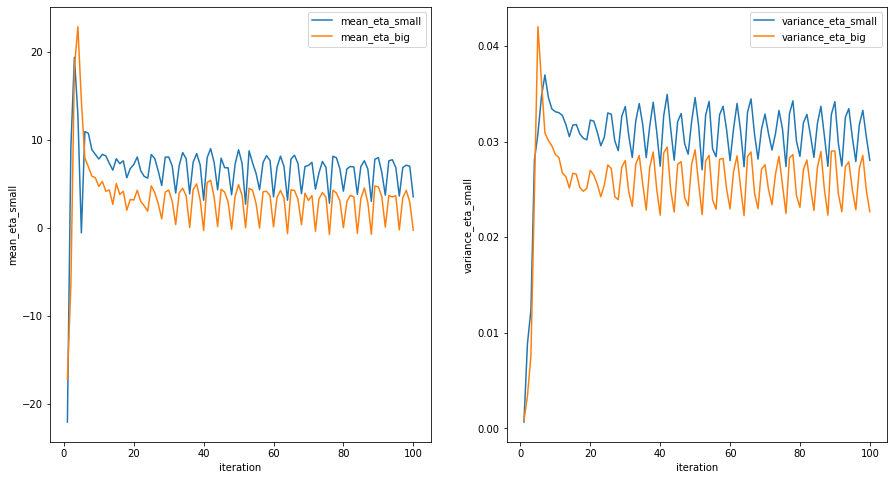

In [53]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
axs = axs.flatten()
sns.lineplot(data=history_df, x="iteration", y="mean_eta_small", label="mean_eta_small", ax=axs[0])
sns.lineplot(data=history_df, x="iteration", y="mean_eta_big", label = "mean_eta_big", ax=axs[0])
sns.lineplot(data=history_df, x="iteration", y="variance_eta_small", label="variance_eta_small", ax=axs[1])
sns.lineplot(data=history_df, x="iteration", y="variance_eta_big", label = "variance_eta_big", ax=axs[1])

In [10]:
def plot_array_parameter(history_df, param, plot_min=True, plot_max=True, plot_relplot=True):
    exploded_param = history_df[param].explode().astype("float")
    if plot_relplot: sns.relplot(x=exploded_param.index, y=exploded_param.values, ci="sd", kind="line")
    if plot_min:     sns.lineplot(x= history_df.index, y=history_df[param].apply(lambda row: row.min()), color="r")
    if plot_max:     sns.lineplot(x= history_df.index, y=history_df[param].apply(lambda row: row.max()), color="g")
    plt.show()

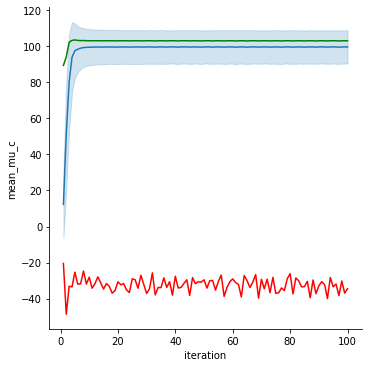

In [67]:
plot_array_parameter(history_df, "mean_mu_c")

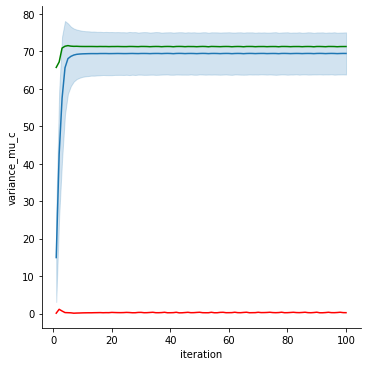

In [68]:
plot_array_parameter(history_df, "variance_mu_c")

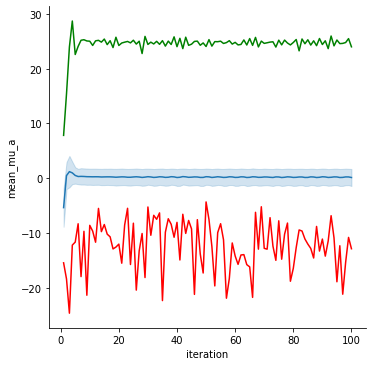

In [69]:
plot_array_parameter(history_df, "mean_mu_a")

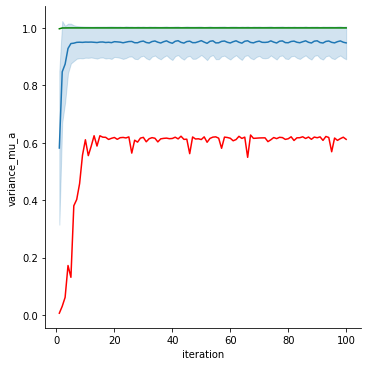

In [70]:
plot_array_parameter(history_df, "variance_mu_a")

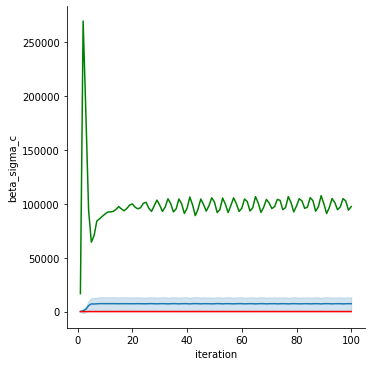

In [12]:
plot_array_parameter(history_df, "beta_sigma_c")

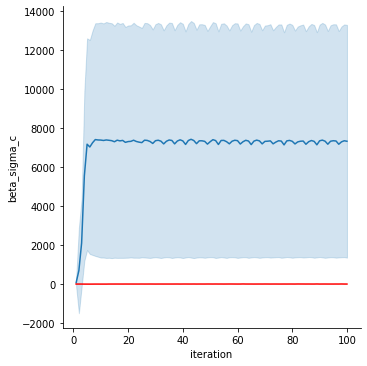

In [11]:
plot_array_parameter(history_df, "beta_sigma_c", plot_max=False)